In [45]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
#visulaization modules

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [46]:
#将xlsx格式文件转换为csv文件
#.csv文件其实相当于使用英文逗号分隔的文本，.xlsx/xls文件则是真正的表格
data = pd.read_excel('Iris.xlsx',index_col=0)
data.to_csv('Iris.csv',encoding='utf-8')

In [147]:
dataFrame = pd.read_csv('Iris.csv')
dataFrame = dataFrame.sample(frac=0.3)
dataFrame

,sepal_len,sepal_wid,petal_len,petal_wid,Class
53,5.5,2.3,4.0,1.3,1
62,6.0,2.2,4.0,1.0,1
37,4.9,3.1,1.5,0.1,0
130,7.4,2.8,6.1,1.9,2
23,5.1,3.3,1.7,0.5,0
134,6.1,2.6,5.6,1.4,2
96,5.7,2.9,4.2,1.3,1
29,4.7,3.2,1.6,0.2,0
64,5.6,2.9,3.6,1.3,1
88,5.6,3.0,4.1,1.3,1


In [155]:
dataFrame.describe()

,sepal_len,sepal_wid,petal_len,petal_wid,Class
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,5.864444,3.024444,3.904444,1.282222,1.066667
std,0.774055,0.435449,1.704133,0.738638,0.809040
min,4.300000,2.200000,1.100000,0.100000,0.000000
25%,5.400000,2.800000,1.600000,0.500000,0.000000
50%,5.900000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.900000,2.000000
max,7.700000,4.100000,6.700000,2.500000,2.000000


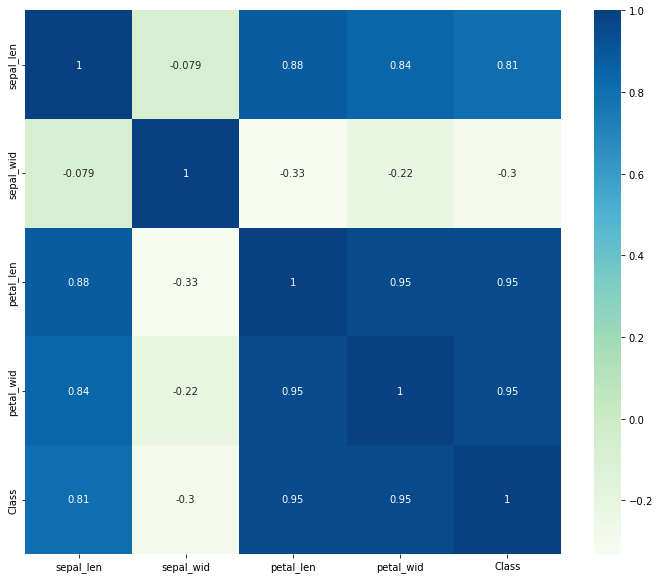

In [156]:
plt.figure(figsize=(12,10))  # Set the size of figure to 12 by 10.
p=sns.heatmap(dataFrame.corr(), annot=True,cmap ='GnBu') 

1    16
2    16
0    13
Name: Class, dtype: int64


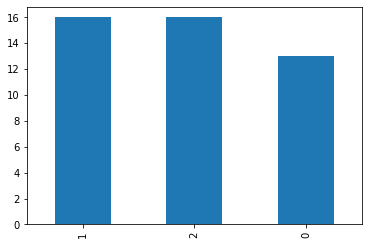

In [157]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = dataFrame["Class"].map(lambda x: color_wheel.get(x + 1))
print(dataFrame.Class.value_counts())
p=dataFrame.Class.value_counts().plot(kind="bar")

In [158]:
sc_X = StandardScaler()
# Define the input and target variables
X =  pd.DataFrame(sc_X.fit_transform(dataFrame.drop(["Class"],axis = 1),),
        columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']) #Input
#Target/class
y = dataFrame.Class 
X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,-0.476145,-1.682470,0.056706,0.024340
1,0.177103,-1.914713,0.056706,-0.386402
2,-1.260042,0.175472,-1.426892,-1.618630
3,2.006196,-0.521256,1.302929,0.845825
4,-0.998743,0.639958,-1.308204,-1.070973


In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42, stratify=y)
print(X_train.shape[0])
print(X_test.shape[0])

31
14


In [159]:
test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Find the max score from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {}% and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0% and k = [1]
Max test score 50.0% and k = [3]


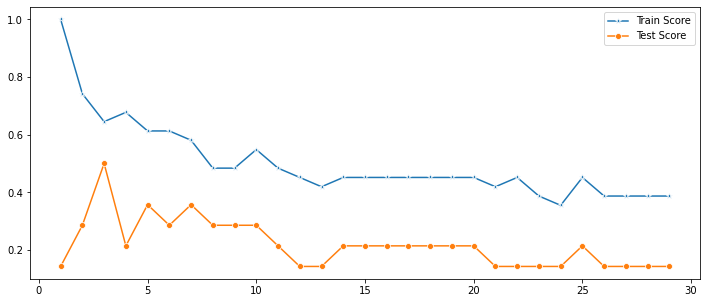

In [161]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

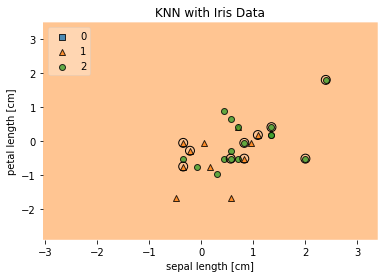

In [162]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

#plot decision boundary 
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value},
                      filler_feature_ranges={2: width, 3: width},
                      X_highlight=X_test.values)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('KNN with Iris Data')
plt.show()